In [1]:
#利用KNN进行多变量时序预测欺骗干扰

#导入库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# 导入数据集
dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')

In [3]:
#查看数据集的前5个值
dataset.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.0,2.5,11.0,2176.0,438825400.0,6287.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.1,3145920.0,-3.46,2.11,0.0,0.0,1
1,161.0,1.0,31.0,2190.0,289780800.0,1422.4,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.0,3145920.0,1.50,-1.53,0.0,0.0,0
2,37.0,1.0,31.0,2190.0,289912800.0,1554.4,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.2,3145920.0,2.33,-1.54,0.0,0.0,0
3,170.0,2.5,11.0,2176.0,438838400.0,6300.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.5,3145920.0,-3.50,2.47,0.0,0.0,1
4,124.0,1.0,31.0,2190.0,289743600.0,1385.2,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.3,3145920.0,2.43,-1.39,0.0,0.0,0


In [4]:
## 数据集打乱顺序
#from sklearn.utils import shuffle  
#dataset = shuffle(dataset) 
#dataset.head()

In [5]:
#将数据集拆分为独立变量和因变量
X = dataset[dataset.columns[:-1]]   #从0到倒数第一列
y = dataset.Jammer                  #只包括data的y这一列

In [7]:
#将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 34)

In [8]:
#功能缩放，使变量在单个缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)


#数据的标准化
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)
print(type(X_norm))

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
print(sum(var_ratio))

[[ 0.81415647 -0.09689669 -0.76446413 ...  0.68142973  0.
   0.        ]
 [ 1.6745845  -0.09689669 -0.17302073 ...  0.22885598  0.
   0.        ]
 [-1.33817966 -0.17330128  1.10843997 ... -0.53998726  0.
   0.        ]
 ...
 [ 1.28939091 -0.17330128  1.10843997 ... -0.98526328  0.
   0.        ]
 [-1.29690892 -0.07142849 -1.15875973 ...  0.0151235   0.
   0.        ]
 [ 0.43124901 -0.09689669 -0.76446413 ...  0.2932567   0.
   0.        ]]
<class 'numpy.ndarray'>
[2.33678490e+01 3.18725787e+00 3.03194230e+00 2.51087245e+00
 2.08711708e+00 1.91180891e+00 1.72409460e+00 1.55472582e+00
 1.47879104e+00 1.30063764e+00 1.18260495e+00 1.08997130e+00
 1.06476709e+00 1.01020145e+00 9.90861306e-01 8.75162663e-01
 8.54478701e-01 7.89884302e-01 7.35038442e-01 6.91760564e-01
 6.25664898e-01 5.89849803e-01 5.15159979e-01 4.70747447e-01
 4.68835051e-01 4.06773562e-01 3.76937198e-01 3.53897849e-01
 3.37002812e-01 3.28773425e-01 2.99186854e-01 2.82829954e-01
 2.71790674e-01 2.35498667e-01 2.29580275e-0

In [9]:
##可视化方差比例
#fig2 = plt.figure(figsize=(10,5))
##plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14],var_ratio)
#var=range(1,65,1)
#plt.bar(var,var_ratio)
#plt.xlabel('Components')
#plt.xlabel('Components')
#plt.ylabel('Variance ratio')
#plt.show()

(9679, 25) (9679, 64)
[0.40285232 0.05494704 0.05226947 0.04328643 0.03598106 0.03295882
 0.0297227  0.02680285 0.02549376 0.02242247 0.02038763 0.01879067
 0.01835616 0.01741546 0.01708205 0.01508745 0.01473086 0.01361729
 0.01267177 0.01192567 0.01078619 0.01016875 0.00888104 0.00811549
 0.00808235]
<class 'numpy.ndarray'>
0.933


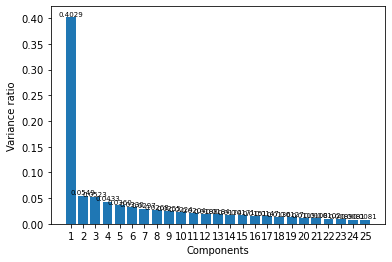

In [10]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

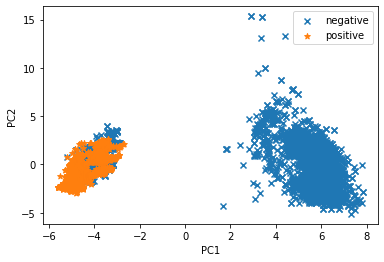

In [12]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [13]:
# 降维后的模型建立与训练

#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

PCA_KNN = KNeighborsClassifier(n_neighbors=1,weights='uniform')
PCA_KNN.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
##放到最后，因为KNN+网格搜索太慢了###
#Grid Search定义好要搜索的参数的集合
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights':['uniform'],
               'n_neighbors':[i for i in range(1,11)]},
              {'weights':['distance'],
                'n_neighbors':[i for i in range(1,11)],
               'p':[i for i in range(1,6)]}
              ]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf,param_grid,cv=10)#定义好网格搜索对象

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

grid_search.fit(X_train_pca,y_train)
grid_search.best_estimator_
grid_search.best_params_

{'n_neighbors': 1, 'p': 5, 'weights': 'distance'}

In [16]:
PCA_KNN = KNeighborsClassifier(n_neighbors=1,p=5,weights='distance')
PCA_KNN.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=1, p=5, weights='distance')

In [19]:
#测试集数据降维到25维
pca = PCA(n_components=25)

X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)

print(X_test_pca)
print(X_test_pca.shape)

[[ 3.81409779 -0.65703319 -0.76557135 ... -0.26517717 -1.3873133
  -0.52458998]
 [ 5.36095085  1.87808791  0.74463659 ...  0.50815494  1.08988149
   0.1799761 ]
 [ 5.12458606  1.3172414  -0.32712689 ...  1.28569457 -0.4279351
   0.23409371]
 ...
 [-4.60335854 -2.88271506  2.27562707 ...  0.07662194 -1.29536056
  -0.41300872]
 [-4.24007725  1.13403564 -0.7506252  ...  0.29863567 -0.27270781
  -0.0634987 ]
 [ 5.32647779  1.8234236   1.96752571 ... -0.63732652  0.77160192
   0.74591781]]
(4149, 25)


In [20]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_KNN.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[0 0 0 ... 1 1 0]
(4149,)
PCA测试集准确率: 0.8711


PCA测试集精确率: 0.8815


PCA测试集召回率: 0.8545


PCA测试集F1值: 0.8678


In [21]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[1858  236]
 [ 299 1756]]


In [23]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\nKNN分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  3614
错误预测值的数量:  535


In [25]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     0.8614    0.8873    0.8741      2094
           1     0.8815    0.8545    0.8678      2055

    accuracy                         0.8711      4149
   macro avg     0.8715    0.8709    0.8710      4149
weighted avg     0.8714    0.8711    0.8710      4149



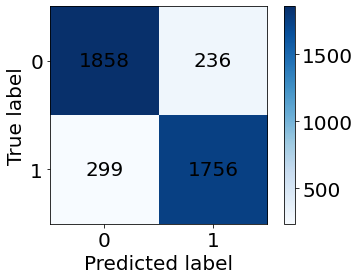

In [27]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [29]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_KNN, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.9928 0.9952 0.9904 0.9952 0.9952 0.9976 0.9952 0.9976 0.9952 1.    ]


10折交叉验证平均准确率： 0.9954


In [30]:
precision = cross_val_score(PCA_KNN, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [0.9951 1.     0.9902 0.9951 1.     0.9952 0.9904 0.9952 0.9904 1.    ]


10折交叉验证平均精确率： 0.9952


In [31]:
recall = cross_val_score(PCA_KNN, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.9902 0.9902 0.9902 0.9951 0.9903 1.     1.     1.     1.     1.    ]


10折交叉验证平均召回率： 0.9956


In [32]:
f1 = cross_val_score(PCA_KNN, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.9927 0.9951 0.9902 0.9951 0.9951 0.9976 0.9952 0.9976 0.9952 1.    ]


10折交叉验证平均f1值： 0.9954


In [33]:
roc_auc = cross_val_score(PCA_KNN,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [0.9927 0.9951 0.9904 0.9952 0.9951 0.9976 0.9952 0.9976 0.9952 1.    ]


10折交叉验证平均ROC_AUC值： 0.9954


[0 1]


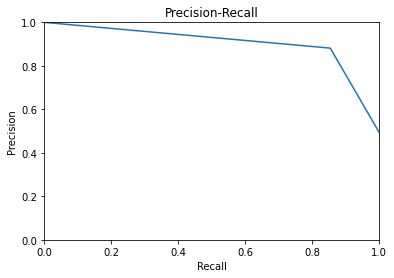

In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()